In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("sample.txt", sep=' ')

In [4]:
data['sim_vars'] = data['num_splits'] + 1

In [5]:
data.head()

,num_copies,num_changes,motif,num_splits,m_num_vars1,m_num_vars2,m_num_pos,w_num_vars1,w_num_vars2,w_num_pos,rep1,rep2,sim_vars
0,2,1,AG,1,1,1,1,1,1,2,AGAGAGAGA,AGAGTGAGA,2
1,2,1,AG,2,1,1,1,1,1,2,AGAGAGAGA,AGATAGAGA,3
2,2,1,AG,1,1,1,1,1,1,1,AGAGAGAGA,AGAGATA,2
3,2,1,AG,2,1,1,1,1,1,2,AGAGAGAGA,AGATAGAGA,3
4,2,1,AG,1,1,1,1,1,1,1,AGAGAGAGA,AGAGATAGA,2


In [6]:
data[data['sim_vars'] == 3]

,num_copies,num_changes,motif,num_splits,m_num_vars1,m_num_vars2,m_num_pos,w_num_vars1,w_num_vars2,w_num_pos,rep1,rep2,sim_vars
1,2,1,AG,2,1,1,1,1,1,2,AGAGAGAGA,AGATAGAGA,3
3,2,1,AG,2,1,1,1,1,1,2,AGAGAGAGA,AGATAGAGA,3
5,2,1,AG,2,1,1,1,1,1,1,AGAGAGAGA,AGAGAGATA,3
7,3,1,AG,2,1,1,1,1,1,2,AGAGAGAGAGA,AGAGGGAGAGA,3
9,3,1,AG,2,1,1,1,1,1,1,AGAGAGAGAGA,AGAGAGTGAGA,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,3,6,ATATATATTATATATGGCTG,2,1,3,3,1,1,2,ATATATATTATATATGGCTGATATATATTATATATGGCTGATATAT...,ATATATATTTATATGGCTGATATATATAAATATATGGCTATTATAT...,3
29992,4,1,ATATATATTATATATGGCTG,2,1,2,2,1,2,3,ATATATATTATATATGGCTGATATATATTATATATGGCTGATATAT...,ATATATATTTATATGGCTGAATATATATTATATATGGCTGATATAT...,3
29994,4,4,ATATATATTATATATGGCTG,2,1,3,3,1,1,2,ATATATATTATATATGGCTGATATATATTATATATGGCTGATATAT...,ATATATATTTATATGGCTGATATATATAAATATATGGCTAATATTT...,3
29996,4,8,ATATATATTATATATGGCTG,2,1,2,2,1,2,3,ATATATATTATATATGGCTGATATATATTATATATGGCTGATATAT...,ATATATATTTATATGGCTGAATGTATAATATATATTGCTAATATAT...,3


<Axes: xlabel='sim_vars', ylabel='value'>

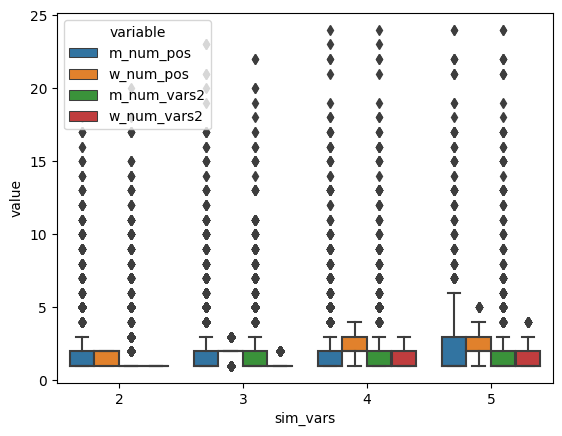

In [7]:
m = data.melt(id_vars=['sim_vars'], value_vars=['m_num_pos', 'w_num_pos', 'm_num_vars2', 'w_num_vars2'])
sb.boxplot(data=m, x="sim_vars", y='value', hue='variable')

In [13]:
data['sim_vars'].describe()

count    29999.000000
mean         3.117371
std          1.054861
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: sim_vars, dtype: float64

In [12]:
m.groupby(['variable'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
m_num_pos,29999.0,1.874696,1.720115,1.0,1.0,1.0,2.0,24.0
m_num_vars2,29999.0,1.721957,1.660696,1.0,1.0,1.0,2.0,24.0
w_num_pos,29999.0,1.965066,0.638702,1.0,2.0,2.0,2.0,5.0
w_num_vars2,29999.0,1.204707,0.437580,1.0,1.0,1.0,1.0,4.0


While both harmonization approaches reduce the number of variants
independent alignment (wfa) of haplotypes places the remaining variants in more places wheras multiple sequence alignment finds a more parsimonious representation across all haplotypes. This results in more consistent variant representations which facilitates variant comparison.

So, as soon as I can figure out what's happening with sim_vars==3, I think this is good to go. 

<Axes: xlabel='sim_vars', ylabel='value'>

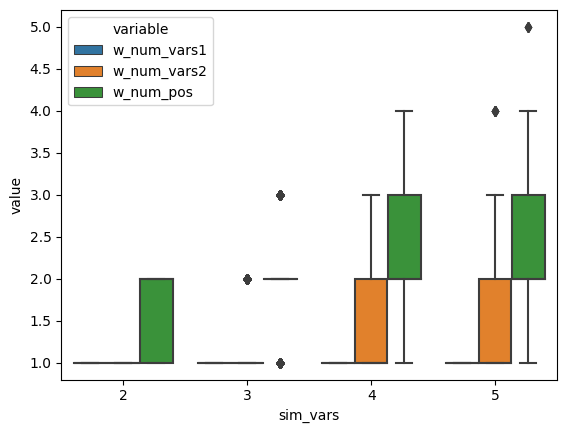

In [35]:
m = data.melt(id_vars=['sim_vars'], value_vars=['w_num_vars1', 'w_num_vars2', 'w_num_pos'])
sb.boxplot(data=m, x="sim_vars", y='value', hue='variable')

<Axes: xlabel='sim_vars', ylabel='value'>

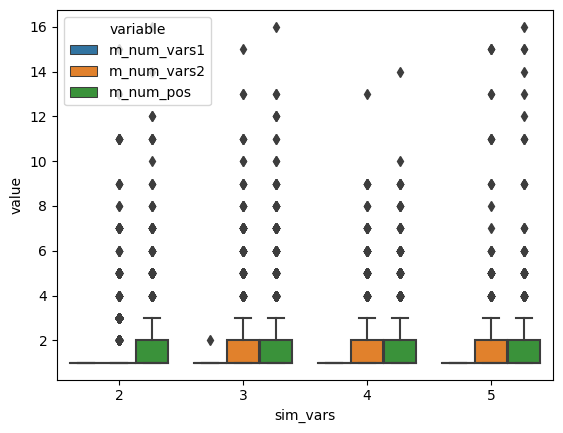

In [36]:
m = data.melt(id_vars=['sim_vars'], value_vars=['m_num_vars1', 'm_num_vars2', 'm_num_pos'])
sb.boxplot(data=m, x="sim_vars", y='value', hue='variable')

<Axes: xlabel='sim_vars', ylabel='m_num_pos'>

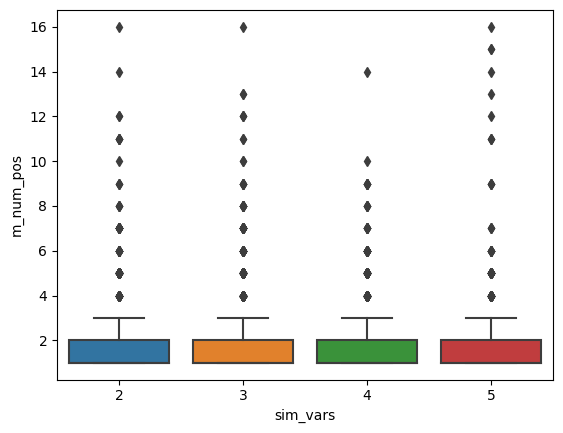

In [37]:
sb.boxplot(data=data, x='sim_vars', y='m_num_pos')

<Axes: xlabel='sim_vars', ylabel='w_num_pos'>

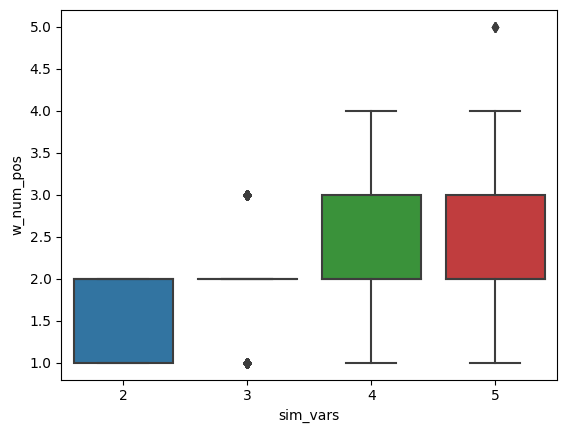

In [38]:
sb.boxplot(data=data, x='sim_vars', y='w_num_pos')

In [13]:
data[data['sim_vars'] == 4]

,num_copies,num_changes,motif,num_splits,m_num_vars1,m_num_vars2,m_num_pos,w_num_vars1,w_num_vars2,w_num_pos,rep1,rep2,sim_vars
203,3,1,TGAA,3,1,1,1,1,1,2,TGAATGAATGAATGAAAGAATGAATGAATGAATG,TGAAAGAATGAATGAATGAATGAATGAATGCATG,4
206,3,1,TGAA,3,1,1,1,1,1,2,TGAATGAATGAATGAAAGAATGAATGAATGAATG,TGAAAGAATGAATGAATGAATGAATGAATTAATG,4
209,3,1,TGAA,3,1,1,1,1,1,2,TGAATGAATGAATGAAAGAATGAATGAATGAATG,TGAAAGAATGAATGAACGAATGAATGAATGAATG,4
212,4,1,TGAA,3,1,1,1,1,1,2,TGAATGAATGAATGAATGAAAGAATGAATGAATGAATG,TGAAAGAATGAATGAATGAATGAATGAAAGAATGAATG,4
216,4,1,TGAA,3,1,1,1,1,1,2,TGAATGAATGAATGAATGAAAGAATGAATGAATGAATG,TGAAAGAATGAATGAATGAATGACTGAATGAATGAATG,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,11,22,AAAGTTATATATGGTGCTAT,3,1,3,3,1,1,2,AAAGTTATATATGGTGCTATAAAGTTATATATGGTGCTATAAAGTT...,AAAATTATATATGGTGCTATAAAGTTATATATGGTGCTATATAAGT...,4
989,12,1,AAAGTTATATATGGTGCTAT,3,1,3,3,1,1,2,AAAGTTATATATGGTGCTATAAAGTTATATATGGTGCTATAAAGTT...,AAAATTATATATGGTGCTATAAAGTTATATATGGTGCTATATAAGT...,4
992,12,12,AAAGTTATATATGGTGCTAT,3,1,3,3,1,1,2,AAAGTTATATATGGTGCTATAAAGTTATATATGGTGCTATAAAGTT...,AAAATTATATATGGTGCTATAAAGTTATATATGGTGCTATATAAGT...,4
995,12,24,AAAGTTATATATGGTGCTAT,3,1,2,2,1,2,3,AAAGTTATATATGGTGCTATAAAGTTATATATGGTGCTATAAAGTT...,AAAATTATATATGGTGCTATAAAGTTATATATGGTGCTATAAAGTT...,4


In [41]:
data['num_changes'].value_counts()

1      5531
2      1421
3       710
4       599
5       294
       ... 
60        1
238       1
136       1
76        1
98        1
Name: num_changes, Length: 85, dtype: int64

In [44]:
# How often is the 'single event' represented at a single position
for i in ['w', 'm']:
    for m in ['_num_pos', '_num_vars1', '_num_vars2']:
        print(i + m)
        v = data.groupby('sim_vars')[i + m].value_counts().unstack().sum(axis=0)
        print(pd.concat([v, v/len(data)], axis=1))

w_num_pos
                0         1
w_num_pos                  
1          2423.0  0.242324
2          6148.0  0.614861
3          1348.0  0.134813
4            76.0  0.007601
5             4.0  0.000400
w_num_vars1
                0    1
w_num_vars1           
1            9999  1.0
w_num_vars2
                  0         1
w_num_vars2                  
1            8252.0  0.825283
2            1631.0  0.163116
3             108.0  0.010801
4               8.0  0.000800
m_num_pos
                0         1
m_num_pos                  
1          6472.0  0.647265
2          1673.0  0.167317
3          1186.0  0.118612
4           241.0  0.024102
5           238.0  0.023802
6            69.0  0.006901
7            52.0  0.005201
8            18.0  0.001800
9            19.0  0.001900
10            4.0  0.000400
11           10.0  0.001000
12            6.0  0.000600
13            3.0  0.000300
14            3.0  0.000300
15            2.0  0.000200
16            3.0  0.000300
m_num_v

In [16]:
data.groupby('sim_vars')['m_num_pos'].value_counts()

sim_vars  m_num_pos
2         1            292
          3             45
          2             30
          5             15
          7              2
          4              1
3         1            228
          2             41
          3             27
          4              4
          5              4
          7              2
          6              1
4         1            108
          2             27
          3             24
          5              8
          4              2
          7              2
          9              2
          6              1
          10             1
5         1             97
          2             12
          3             10
          4              4
          5              4
          6              2
          9              2
          7              1
Name: m_num_pos, dtype: int64